# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pycaret.classification import *

# Data Read-In

In [2]:
raw_data = pd.read_csv("data/student_rawdata_seoul_2015.csv", encoding='cp949')
data = raw_data.iloc[:, [9, 13, 15, 16]]
data

,학교명,성별,키,몸무게
0,신서고등학교,남,172.1,60.5
1,서울난향초등학교,남,139.7,44.5
2,한영외국어고등학교,남,179.0,78.9
3,서울대도초등학교,남,137.0,29.2
4,불광중학교,남,154.9,53.5
...,...,...,...,...
9677,경기초등학교,여,150.8,37.4
9678,성심여자고등학교,여,156.7,79.3
9679,서울길원초등학교,여,148.5,40.2
9680,경기초등학교,여,138.4,41.4


In [3]:
data.columns = ["school", "sex", "height", "weight"]
data

,school,sex,height,weight
0,신서고등학교,남,172.1,60.5
1,서울난향초등학교,남,139.7,44.5
2,한영외국어고등학교,남,179.0,78.9
3,서울대도초등학교,남,137.0,29.2
4,불광중학교,남,154.9,53.5
...,...,...,...,...
9677,경기초등학교,여,150.8,37.4
9678,성심여자고등학교,여,156.7,79.3
9679,서울길원초등학교,여,148.5,40.2
9680,경기초등학교,여,138.4,41.4


# Data Preprocessing

In [4]:
# categorizing school column

for i, val in data[["school"]].iterrows():
    if val.str.endswith("초등학교").bool():
        data.iloc[i, 0] = 0
    elif val.str.endswith("중학교").bool():
        data.iloc[i, 0] = 1
    elif val.str.endswith("고등학교").bool():
        data.iloc[i, 0] = 2

In [5]:
for i, val in data[["sex"]].iterrows():
    if (val == "남").bool():
        data.iloc[i, 1] = 1
    else:
        data.iloc[i, 1] = 0

In [6]:
data

,school,sex,height,weight
0,2,1,172.1,60.5
1,0,1,139.7,44.5
2,2,1,179.0,78.9
3,0,1,137.0,29.2
4,1,1,154.9,53.5
...,...,...,...,...
9677,0,0,150.8,37.4
9678,2,0,156.7,79.3
9679,0,0,148.5,40.2
9680,0,0,138.4,41.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   school  9682 non-null   object 
 1   sex     9682 non-null   object 
 2   height  9682 non-null   float64
 3   weight  9682 non-null   float64
dtypes: float64(2), object(2)
memory usage: 302.7+ KB


# EDA

In [8]:
data["school"].value_counts()

0    3569
2    3532
1    2581
Name: school, dtype: int64

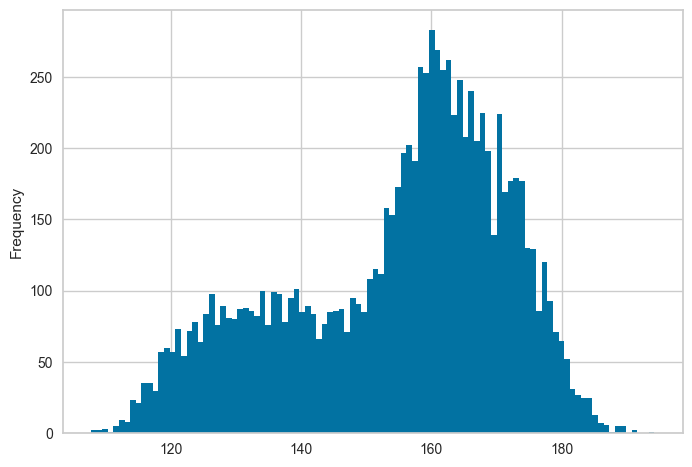

In [9]:
data["height"].plot.hist(bins=100);

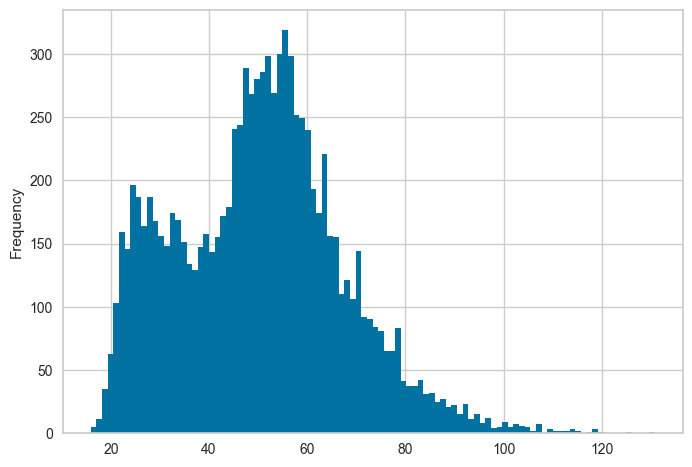

In [10]:
data["weight"].plot.hist(bins=100);

# Setup

In [11]:
experiment = setup(
    data, 
    target='school',
    normalize=True,
    use_gpu=True
)

,Description,Value
0,session_id,8081
1,Target,school
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(9682, 4)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
# Model Selection

model = compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7371,0.8886,0.7000,0.7276,0.7212,0.5951,0.6054,1.1620
lr,Logistic Regression,0.7365,0.8896,0.7033,0.7281,0.7260,0.5958,0.6017,0.0400
qda,Quadratic Discriminant Analysis,0.7343,0.8834,0.6962,0.7295,0.7183,0.5907,0.6038,0.0120
catboost,CatBoost Classifier,0.7285,0.8828,0.6943,0.7187,0.7168,0.5833,0.5896,3.4860
lightgbm,Light Gradient Boosting Machine,0.7264,0.8806,0.6918,0.7175,0.7142,0.5798,0.5871,6.2040
lda,Linear Discriminant Analysis,0.7254,0.8839,0.6926,0.7282,0.7180,0.5794,0.5882,0.0140
ada,Ada Boost Classifier,0.7247,0.7578,0.6932,0.7234,0.7174,0.5787,0.5850,0.1800
xgboost,Extreme Gradient Boosting,0.7245,0.8800,0.6916,0.7167,0.7148,0.5778,0.5832,1.0590
svm,SVM - Linear Kernel,0.7127,0.0000,0.6509,0.7011,0.6304,0.5474,0.6009,0.0320
ridge,Ridge Classifier,0.7112,0.0000,0.6484,0.7684,0.6279,0.5448,0.6085,0.0110


In [13]:
# Model Optimization

tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7478,0.8902,0.7034,0.7327,0.7184,0.6089,0.6263
1,0.7286,0.8742,0.6866,0.7127,0.7046,0.5803,0.5942
2,0.7286,0.8829,0.6842,0.7176,0.7005,0.5793,0.5994
3,0.7316,0.8912,0.6878,0.7187,0.7054,0.5845,0.6022
4,0.7419,0.8968,0.6983,0.7314,0.7155,0.6004,0.6192
5,0.7345,0.8913,0.6911,0.7287,0.7092,0.5889,0.6094
6,0.7507,0.8873,0.7120,0.7505,0.7333,0.6152,0.6309
7,0.7592,0.9043,0.7201,0.7592,0.7395,0.6280,0.6456
8,0.7563,0.8942,0.7196,0.7605,0.7398,0.6239,0.6409


In [14]:
# Finalize model
finalized_model = finalize_model(tuned_model)

# save model to disk
save_model(finalized_model, 'model_for_student_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='school',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                             loss='deviance', max_depth=3,
                                             max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0